# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [5]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

In [6]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC=data.DataReader('BAC','yahoo', start, end)
C=data.DataReader('C','yahoo', start, end)
GS=data.DataReader('GS','yahoo', start, end)
JPM=data.DataReader('JPM','yahoo', start, end)
MS=data.DataReader('MS','yahoo', start, end)
WF=data.DataReader('WF','yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BAC', 'C', 'GS','JPM', 'MS', 'WF' ]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WF], axis = 1, keys = tickers)

** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [10]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.139107  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.161732  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                          WF             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  73.766388  72.228844   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  74.719902  72.884384   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  73.420738  72.526817   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  76.769966  73.897499   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  75.268173  74.195473   

Bank Ticker                                            
Stock Info        Open      Close   Volume  Adj Close  
Date                                                   
2006-01-03   72.705605  72.884384  23400.0  58.224350  
2006-01-04   73.122765  74.016685  27200.0  59.128902  
2006-01-05   73.003578  72.669846  11000.0  58.052959  
2006-01-06   73.897499  75.744934  34800.0  60.509521  
2006-01-09   74.493446  74.195473  30900.0  59.271729  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [11]:
for ticks in tickers:
    print(ticks, bank_stocks[ticks]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WF 99.86888885498047


In [12]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
for tick in tickers:
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()

In [15]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.020456


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

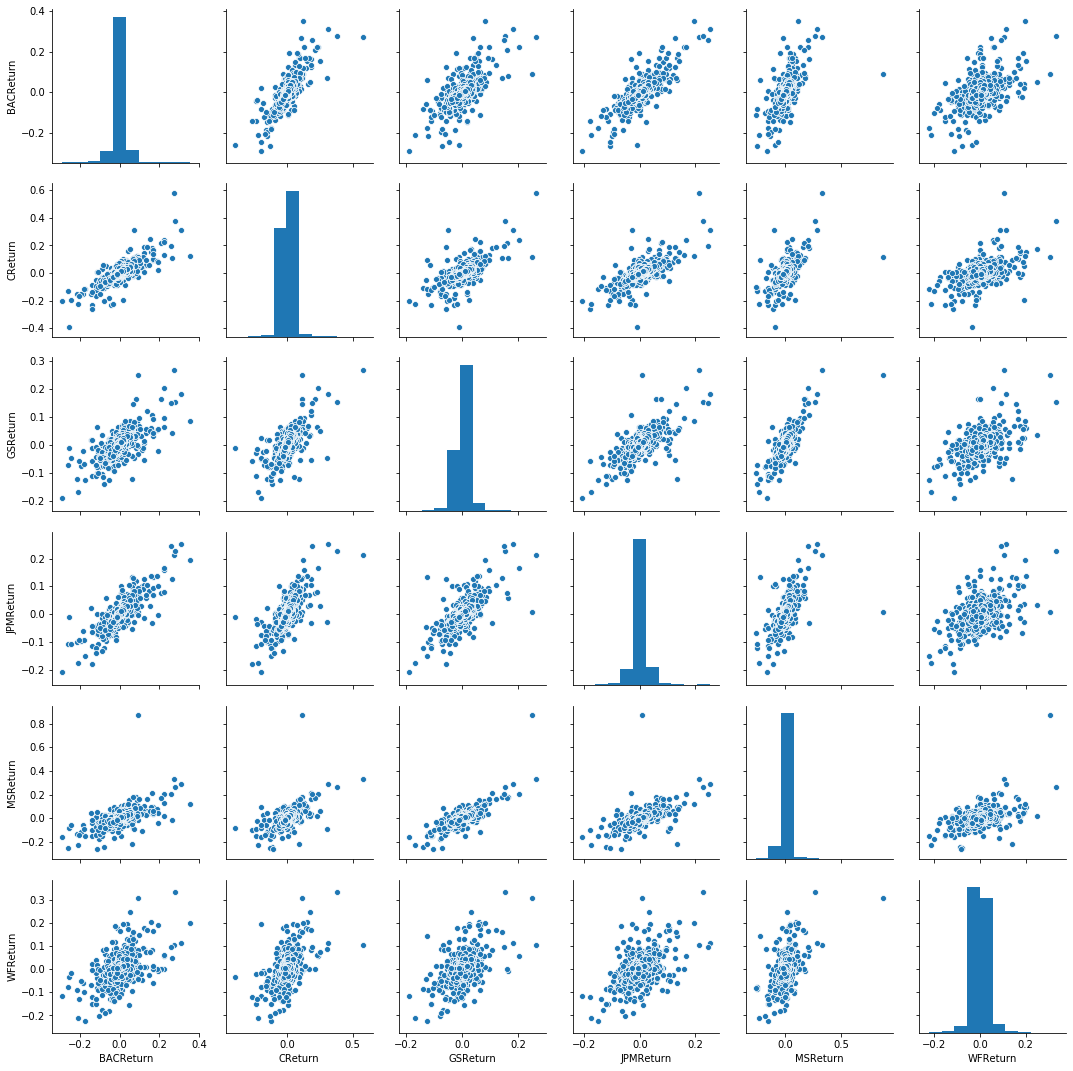

In [16]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [27]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFReturn    2008-09-29
dtype: datetime64[ns]

In [28]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFReturn    2009-03-10
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFReturn    2009-03-10
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [30]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFReturn     0.035348
dtype: float64

In [31]:
returns.ix['2015-01-01':'2015-12-31'].std()

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFReturn     0.022002
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


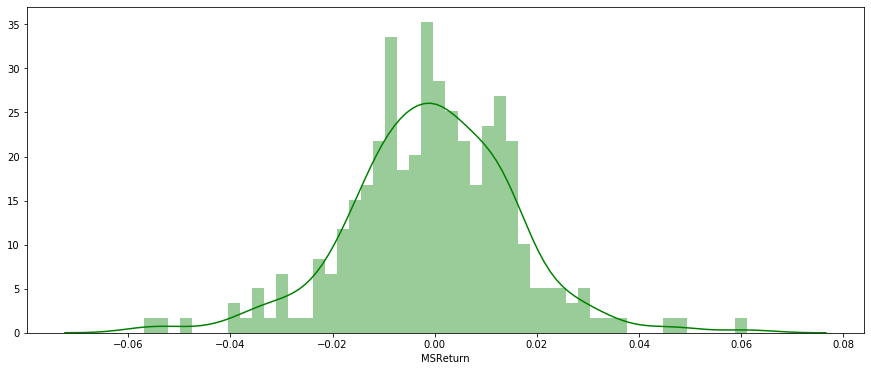

In [42]:
plt.figure(figsize=(15,6))
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MSReturn'], color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


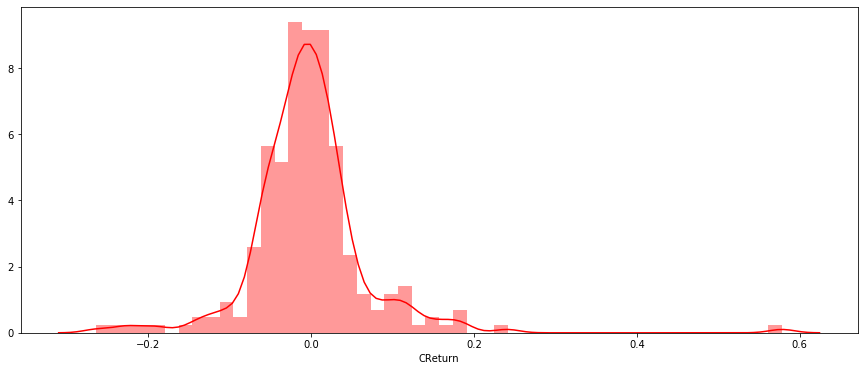

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CReturn'], color='red', bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

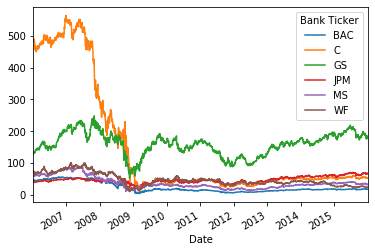

In [48]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').plot()

<function matplotlib.pyplot.legend(*args, **kwargs)>

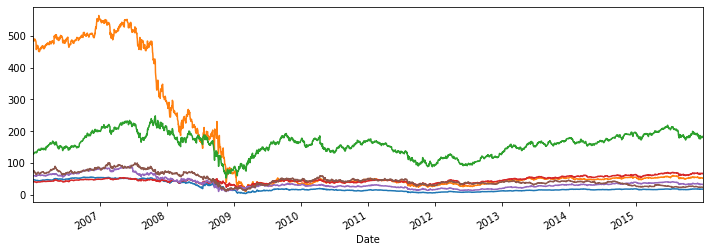

In [54]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend

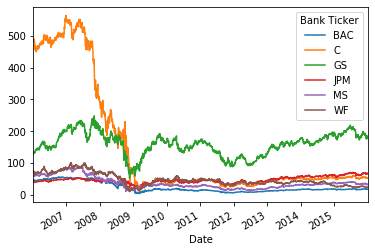

In [56]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

In [59]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



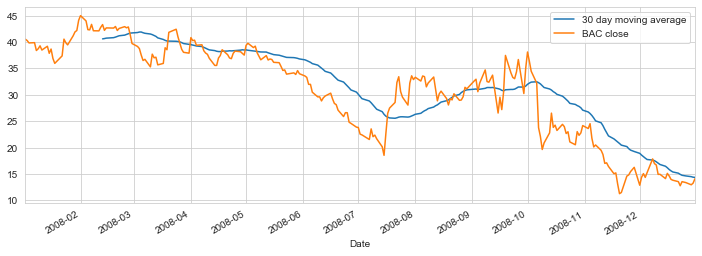

In [66]:
plt.figure(figsize=(12,4))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label="BAC close")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

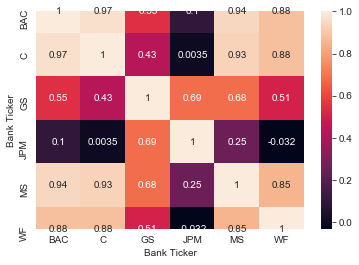

In [71]:

sns.heatmap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

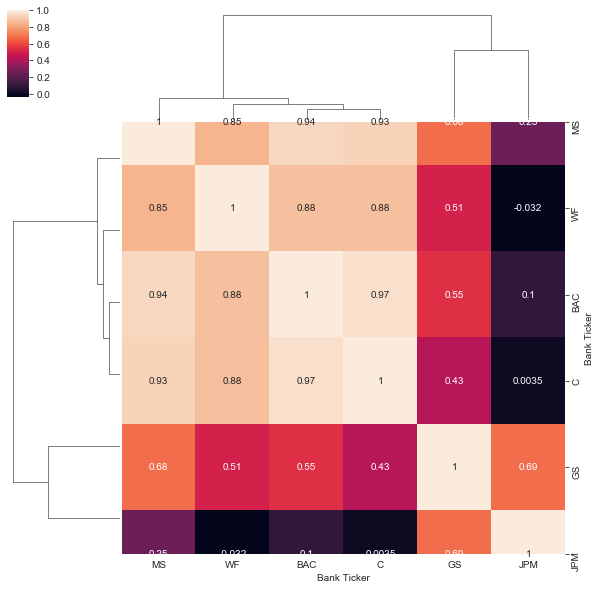

In [72]:
sns.clustermap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [77]:
close_corr=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [78]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.523922
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.146645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.191933
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.139107
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.161732
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,16.071533
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.941246
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,16.080839


In [83]:
bac15=BAC[['High', 'Low', 'Open' ,'Close']].ix['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [85]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot('sma', periods=[13,21,55])

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [87]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/home/modith/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

